## Actividad 8

In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import Curves2D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy.table import Table
import matplotlib.ticker as ticker

In [2]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 7/' 
# path_win =

In [3]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')
Ref    = table[(table['Stars_Mass']>=1e10)].copy()
Ref

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0       9498012  28000000000002       28  2.220446e-16               6   
1       9508202  28000000000002       28  2.220446e-16               7   
2       9512113  28000000000002       28  2.220446e-16               8   
3       9517736  28000000000002       28  2.220446e-16               9   
4       9519365  28000000000002       28  2.220446e-16              10   
...         ...             ...      ...           ...             ...   
13131  10365607  28000000002202       28  2.220446e-16               0   
13145  10859653  28000000002570       28  2.220446e-16               0   
13155  11104654  28000000002905       28  2.220446e-16               0   
13164  11247394  28000000003127       28  2.220446e-16               0   
13199  12002343  28000000004258       28  2.220446e-16               0   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                 8.913222            35.828056            54.839039   
1                 6.904262            35.705917            57.397373   
2                 8.682913            35.504921            54.217369   
3                 8.278317            37.063808            54.914932   
4                 8.262937            36.454063            55.901993   
...                    ...                  ...                  ...   
13131            35.516003            10.797990            34.600616   
13145            61.355499            48.616516            65.236801   
13155            97.197350            82.709518            43.676567   
13164            88.764885            47.226864            81.905136   
13199            81.653595             7.551041            69.749985   

         Stars_Mass       SF_Mass  ...  NSF_Hydrogen  NSF_Oxygen  \
0      1.538708e+11  0.000000e+00  ...      0.000000    0.000000   
1      7.604099e+10  2.281596e+09  ...      0.727174    0.004796   
2      1.345128e+11  1.514760e+10  ...      0.696796    0.010628   
3      2.232997e+10  2.754609e+09  ...      0.714222    0.007443   
4      4.833353e+10  0.000000e+00  ...      0.000000    0.000000   
...             ...           ...  ...           ...         ...   
13131  1.226640e+10  1.538676e+09  ...      0.740806    0.002266   
13145  1.094640e+10  3.207207e+09  ...      0.741599    0.002183   
13155  1.200869e+10  1.247963e+09  ...      0.743705    0.001579   
13164  1.186733e+10  2.167418e+09  ...      0.737761    0.002874   
13199  1.051248e+10  5.572393e+08  ...      0.695981    0.010365   

       NSF_Metallicity  StarFormationRate  InitialMassWeightedStellarAge  \
0             0.000000           0.000000                      10.139413   
1             0.011342           0.841832                       9.455478   
2             0.024796          12.094972                       7.656161   
3             0.017283           1.334875                       8.117089   
4             0.000000           0.000000                       8.520104   
...                ...                ...                            ...   
13131         0.005160           0.456897                       7.618259   
13145         0.004858           1.192947                       6.309848   
13155         0.003758           0.506203                       6.814752   
13164         0.006602           0.686905                       6.787498   
13199         0.025381           0.195091                       7.920490   

       ApertureSize     Mass_Star  SFR_30pkpc  Group_R_Crit200  \
0                30  1.307842e+11    0.000000      1411.312012   
1                30  6.641890e+10    0.823222      1411.312012   
2                30  1.183275e+11   10.984530      1411.312012   
3                30  2.024596e+10    1.322288      1411.312012   
4                30  3.944613e+10    0.000000      1411.312012   
...             ...           ...         ...              ...   
13131            30  1.191011e+10    0.433110       179.04637

In [4]:
SF_O  = Ref['SF_Oxygen']
SF_H  = Ref['SF_Hydrogen']
SF_M  = Ref['SF_Mass']
M_Star= Ref['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

Ref['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))
Ref

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0       9498012  28000000000002       28  2.220446e-16               6   
1       9508202  28000000000002       28  2.220446e-16               7   
2       9512113  28000000000002       28  2.220446e-16               8   
3       9517736  28000000000002       28  2.220446e-16               9   
4       9519365  28000000000002       28  2.220446e-16              10   
...         ...             ...      ...           ...             ...   
13131  10365607  28000000002202       28  2.220446e-16               0   
13145  10859653  28000000002570       28  2.220446e-16               0   
13155  11104654  28000000002905       28  2.220446e-16               0   
13164  11247394  28000000003127       28  2.220446e-16               0   
13199  12002343  28000000004258       28  2.220446e-16               0   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                 8.913222            35.828056            54.839039   
1                 6.904262            35.705917            57.397373   
2                 8.682913            35.504921            54.217369   
3                 8.278317            37.063808            54.914932   
4                 8.262937            36.454063            55.901993   
...                    ...                  ...                  ...   
13131            35.516003            10.797990            34.600616   
13145            61.355499            48.616516            65.236801   
13155            97.197350            82.709518            43.676567   
13164            88.764885            47.226864            81.905136   
13199            81.653595             7.551041            69.749985   

         Stars_Mass       SF_Mass  ...  NSF_Oxygen  NSF_Metallicity  \
0      1.538708e+11  0.000000e+00  ...    0.000000         0.000000   
1      7.604099e+10  2.281596e+09  ...    0.004796         0.011342   
2      1.345128e+11  1.514760e+10  ...    0.010628         0.024796   
3      2.232997e+10  2.754609e+09  ...    0.007443         0.017283   
4      4.833353e+10  0.000000e+00  ...    0.000000         0.000000   
...             ...           ...  ...         ...              ...   
13131  1.226640e+10  1.538676e+09  ...    0.002266         0.005160   
13145  1.094640e+10  3.207207e+09  ...    0.002183         0.004858   
13155  1.200869e+10  1.247963e+09  ...    0.001579         0.003758   
13164  1.186733e+10  2.167418e+09  ...    0.002874         0.006602   
13199  1.051248e+10  5.572393e+08  ...    0.010365         0.025381   

       StarFormationRate  InitialMassWeightedStellarAge  ApertureSize  \
0               0.000000                      10.139413            30   
1               0.841832                       9.455478            30   
2              12.094972                       7.656161            30   
3               1.334875                       8.117089            30   
4               0.000000                       8.520104            30   
...                  ...                            ...           ...   
13131           0.456897                       7.618259            30   
13145           1.192947                       6.309848            30   
13155           0.506203                       6.814752            30   
13164           0.686905                       6.787498            30   
13199           0.195091                       7.920490            30   

          Mass_Star  SFR_30pkpc  Group_R_Crit200  Group_M_Crit200  \
0      1.307842e+11    0.000000      1411.312012     3.002119e+14   
1      6.641890e+10    0.823222      1411.312012     3.002119e+14   
2      1.183275e+11   10.984530      1411.312012     3.002119e+14   
3      2.024596e+10    1.322288      1411.312012     3.002119e+14   
4      3.944613e+10    0.000000      1411.312012     3.002119e+14   
...             ...         ...              ...              ...   
13131  1.191011e+10    0.433110       17

In [5]:
merger = pd.read_csv(path_lin+'Actividad_7(data_level_merge).dat')
merger

GalaxyID_test    GroupID_test  snap_lm          z_lm      L_lm  \
0           9498012  28000000000002     22.0  6.151898e-01  1.369978   
1           9508202  28000000000002     26.0  1.827099e-01  1.000422   
2           9512113  28000000000002     28.0  2.220446e-16  1.002306   
3           9517736  28000000000002     28.0  2.220446e-16  1.147535   
4           9519365  28000000000002     25.0  2.709011e-01  1.008288   
...             ...             ...      ...           ...       ...   
3633       10365607  28000000002202     28.0  2.220446e-16  1.007574   
3634       10859653  28000000002570     28.0  2.220446e-16  1.004723   
3635       11104654  28000000002905     25.0  2.709011e-01  1.007583   
3636       11247394  28000000003127     28.0  2.220446e-16  1.008742   
3637       12002343  28000000004258     24.0  3.656686e-01  1.331562   

      snap_lmm     z_lmm     L_lmm  
0         22.0  0.615190  1.369978  
1         19.0  1.004122  1.325826  
2         24.0  0.365669  1.545269  
3          NaN       NaN       NaN  
4          5.0  7.049566  3.614620  
...        ...       ...       ...  
3633      11.0  3.527977  1.465920  
3634      12.0  3.016505  1.357690  
3635       NaN       NaN       NaN  
3636       NaN       NaN       NaN  
3637      24.0  0.365669  1.331562  

[3638 rows x 8 columns]

In [6]:
df = pd.merge(left= Ref,right=merger, left_on='GalaxyID', right_on='GalaxyID_test')
df

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0      9498012  28000000000002       28  2.220446e-16               6   
1      9508202  28000000000002       28  2.220446e-16               7   
2      9512113  28000000000002       28  2.220446e-16               8   
3      9517736  28000000000002       28  2.220446e-16               9   
4      9519365  28000000000002       28  2.220446e-16              10   
...        ...             ...      ...           ...             ...   
3633  10365607  28000000002202       28  2.220446e-16               0   
3634  10859653  28000000002570       28  2.220446e-16               0   
3635  11104654  28000000002905       28  2.220446e-16               0   
3636  11247394  28000000003127       28  2.220446e-16               0   
3637  12002343  28000000004258       28  2.220446e-16               0   

      CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                8.913222            35.828056            54.839039   
1                6.904262            35.705917            57.397373   
2                8.682913            35.504921            54.217369   
3                8.278317            37.063808            54.914932   
4                8.262937            36.454063            55.901993   
...                   ...                  ...                  ...   
3633            35.516003            10.797990            34.600616   
3634            61.355499            48.616516            65.236801   
3635            97.197350            82.709518            43.676567   
3636            88.764885            47.226864            81.905136   
3637            81.653595             7.551041            69.749985   

        Stars_Mass       SF_Mass  ...  Group_M_Crit200  sf_metalicity  \
0     1.538708e+11  0.000000e+00  ...     3.002119e+14            NaN   
1     7.604099e+10  2.281596e+09  ...     3.002119e+14       9.079824   
2     1.345128e+11  1.514760e+10  ...     3.002119e+14       9.246274   
3     2.232997e+10  2.754609e+09  ...     3.002119e+14       9.050028   
4     4.833353e+10  0.000000e+00  ...     3.002119e+14            NaN   
...            ...           ...  ...              ...            ...   
3633  1.226640e+10  1.538676e+09  ...     6.129222e+11       9.085429   
3634  1.094640e+10  3.207207e+09  ...     5.124048e+11       9.024783   
3635  1.200869e+10  1.247963e+09  ...     4.354551e+11       9.286851   
3636  1.186733e+10  2.167418e+09  ...     3.759434e+11       9.115270   
3637  1.051248e+10  5.572393e+08  ...     2.927332e+11       9.411070   

      GalaxyID_test    GroupID_test  snap_lm          z_lm      L_lm  \
0           9498012  28000000000002     22.0  6.151898e-01  1.369978   
1           9508202  28000000000002     26.0  1.827099e-01  1.000422   
2           9512113  28000000000002     28.0  2.220446e-16  1.002306   
3           9517736  28000000000002     28.0  2.220446e-16  1.147535   
4           9519365  28000000000002     25.0  2.709011e-01  1.008288   
...             ...             ...      ...           ...       ...   
3633       10365607  28000000002202     28.0  2.220446e-16  1.007574   
3634       10859653  28000000002570     28.0  2.220446e-16  1.004723   
3635       11104654  28000000002905     25.0  2.709011e-01  1.007583   
3636       11247394  28000000003127     28.0  2.220446e-16  1.008742   
3637       12002343  28000000004258     24.0  3.656686e-01  1.331562   

      snap_lmm     z_lmm     L_lmm  
0         22.0  0.615190  1.369978  
1         19.0  1.004122  1.325826  
2         24.0  0.365669  1.545269  
3          NaN       NaN       NaN  
4          5.0  7.049566  3.614620  
...        ...       ...       ...  
3633      11.0  3.527977  1.465920  
3634      12.0  3.016505  1.357690  
3635       NaN       NaN       NaN  
3636       NaN       NaN       NaN  
3637      24.0  0.365669  1.331562  

[3638 rows x 41 columns]

In [7]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [8]:
df['t_lm']  = cosmo.age(df['z_lm']).value
df['t_lmm'] = cosmo.age(df['z_lmm']).value

In [9]:
df

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0      9498012  28000000000002       28  2.220446e-16               6   
1      9508202  28000000000002       28  2.220446e-16               7   
2      9512113  28000000000002       28  2.220446e-16               8   
3      9517736  28000000000002       28  2.220446e-16               9   
4      9519365  28000000000002       28  2.220446e-16              10   
...        ...             ...      ...           ...             ...   
3633  10365607  28000000002202       28  2.220446e-16               0   
3634  10859653  28000000002570       28  2.220446e-16               0   
3635  11104654  28000000002905       28  2.220446e-16               0   
3636  11247394  28000000003127       28  2.220446e-16               0   
3637  12002343  28000000004258       28  2.220446e-16               0   

      CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                8.913222            35.828056            54.839039   
1                6.904262            35.705917            57.397373   
2                8.682913            35.504921            54.217369   
3                8.278317            37.063808            54.914932   
4                8.262937            36.454063            55.901993   
...                   ...                  ...                  ...   
3633            35.516003            10.797990            34.600616   
3634            61.355499            48.616516            65.236801   
3635            97.197350            82.709518            43.676567   
3636            88.764885            47.226864            81.905136   
3637            81.653595             7.551041            69.749985   

        Stars_Mass       SF_Mass  ...  GalaxyID_test    GroupID_test  snap_lm  \
0     1.538708e+11  0.000000e+00  ...        9498012  28000000000002     22.0   
1     7.604099e+10  2.281596e+09  ...        9508202  28000000000002     26.0   
2     1.345128e+11  1.514760e+10  ...        9512113  28000000000002     28.0   
3     2.232997e+10  2.754609e+09  ...        9517736  28000000000002     28.0   
4     4.833353e+10  0.000000e+00  ...        9519365  28000000000002     25.0   
...            ...           ...  ...            ...             ...      ...   
3633  1.226640e+10  1.538676e+09  ...       10365607  28000000002202     28.0   
3634  1.094640e+10  3.207207e+09  ...       10859653  28000000002570     28.0   
3635  1.200869e+10  1.247963e+09  ...       11104654  28000000002905     25.0   
3636  1.186733e+10  2.167418e+09  ...       11247394  28000000003127     28.0   
3637  1.051248e+10  5.572393e+08  ...       12002343  28000000004258     24.0   

              z_lm      L_lm  snap_lmm     z_lmm     L_lmm       t_lm  \
0     6.151898e-01  1.369978      22.0  0.615190  1.369978   7.841096   
1     1.827099e-01  1.000422      19.0  1.004122  1.325826  11.501236   
2     2.220446e-16  1.002306      24.0  0.365669  1.545269  13.820530   
3     2.220446e-16  1.147535       NaN       NaN       NaN  13.820530   
4     2.709011e-01  1.008288       5.0  7.049566  3.614620  10.576507   
...            ...       ...       ...       ...       ...        ...   
3633  2.220446e-16  1.007574      11.0  3.527977  1.465920  13.820530   
3634  2.220446e-16  1.004723      12.0  3.016505  1.357690  13.820530   
3635  2.709011e-01  1.007583       NaN       NaN       NaN  10.576507   
3636  2.220446e-16  1.008742       NaN       NaN       NaN  13.820530   
3637  3.656686e-01  1.331562      24.0  0.365669  1.331562   9.698070   

         t_lmm  
0     7.841096  
1     5.863788  
2     9.698070  
3          NaN  
4     0.759586  
...        ...  
3633  1.794518  
3634  2.144303  
3635       NaN  
3636       NaN  
3637  9.698070  

[3638 rows x 43 columns]

## Graficar 12+log10(O/H) vs log10(Mstar) (scatter plot + medianas + percentiles 25th y 75th).

In [10]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()

In [11]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

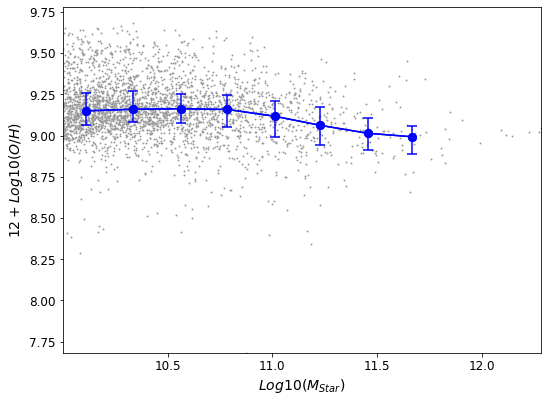

In [12]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig('scatter_log(M)vs_metalicidad.png')


plt.show()

## Scatter coloreados según los parámetros calculados en la actividad 7(L_lm, L_lmm, z_lm, z_lmm_, etc).

## Gráficos para Z_lm:

In [13]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [14]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='z_lm'
colors_var_label=r'$z_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-14-0f228b0f346e>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


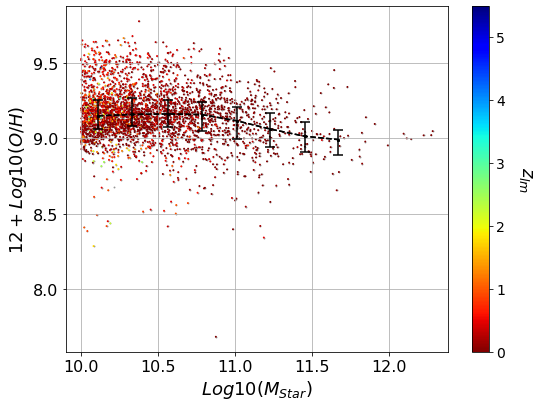

In [15]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly z_lm:**

In [16]:
parametro ='z_lm'

In [17]:
color = df[parametro][mask].to_numpy()

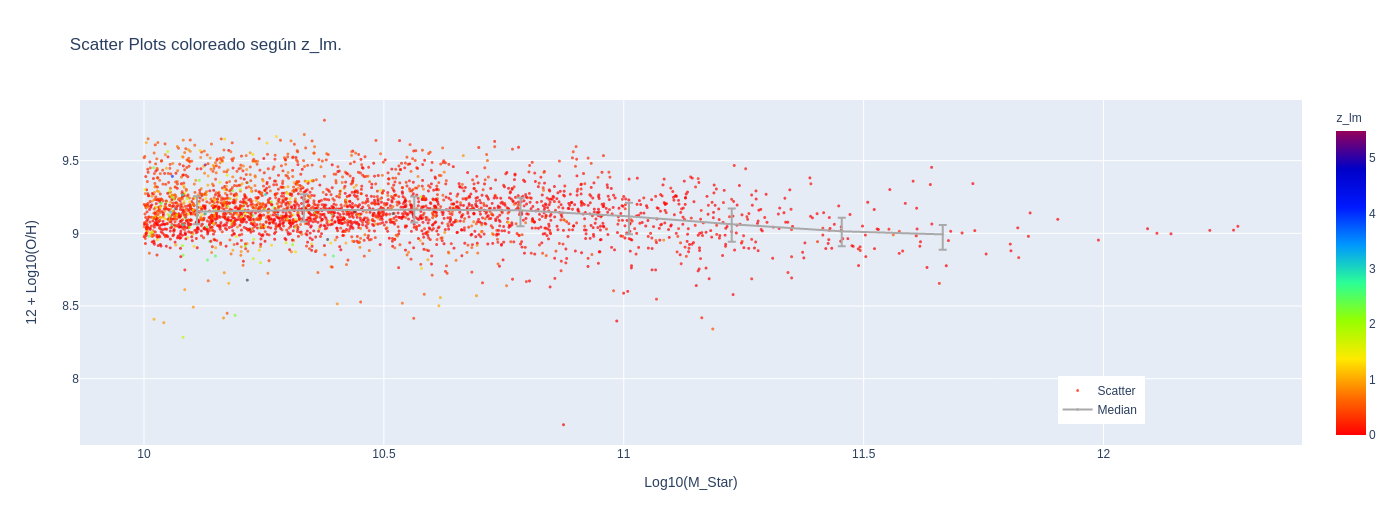

In [18]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="darkgrey",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="darkgrey",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## Z_lmm:

In [19]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='z_lmm'
colors_var_label=r'$z_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-19-805fa43144f7>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



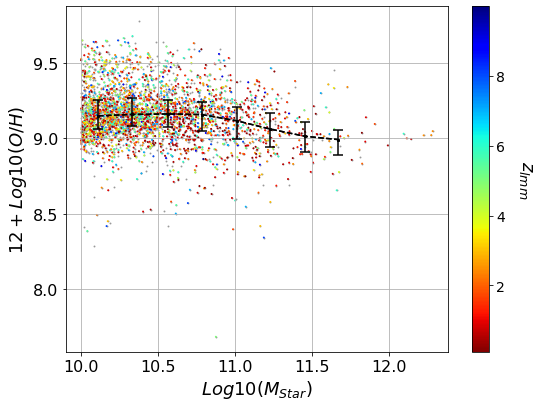

In [20]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly z_lmm:**

In [21]:
parametro ='z_lmm'

In [22]:
color = df[parametro][mask].to_numpy()

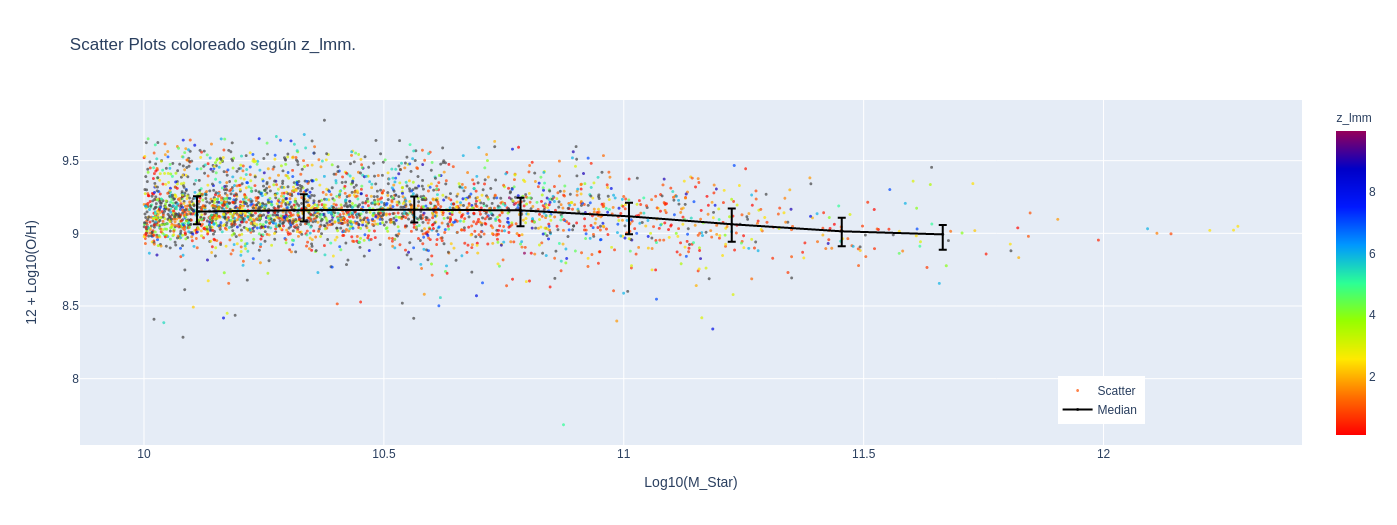

In [23]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## L_lm:

In [24]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='L_lm'
colors_var_label=r'$L_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-24-09bcaa25d55b>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



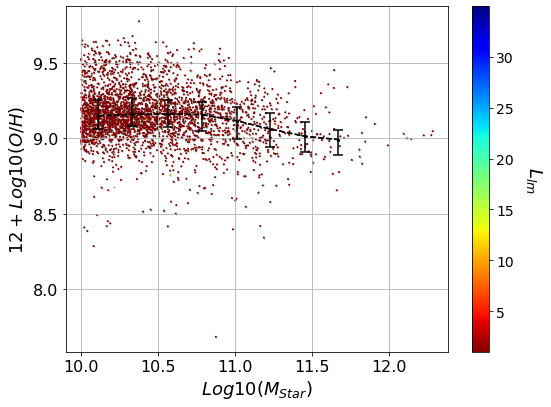

In [25]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [26]:
parametro ='L_lm'

In [27]:
color = df[parametro][mask].to_numpy()

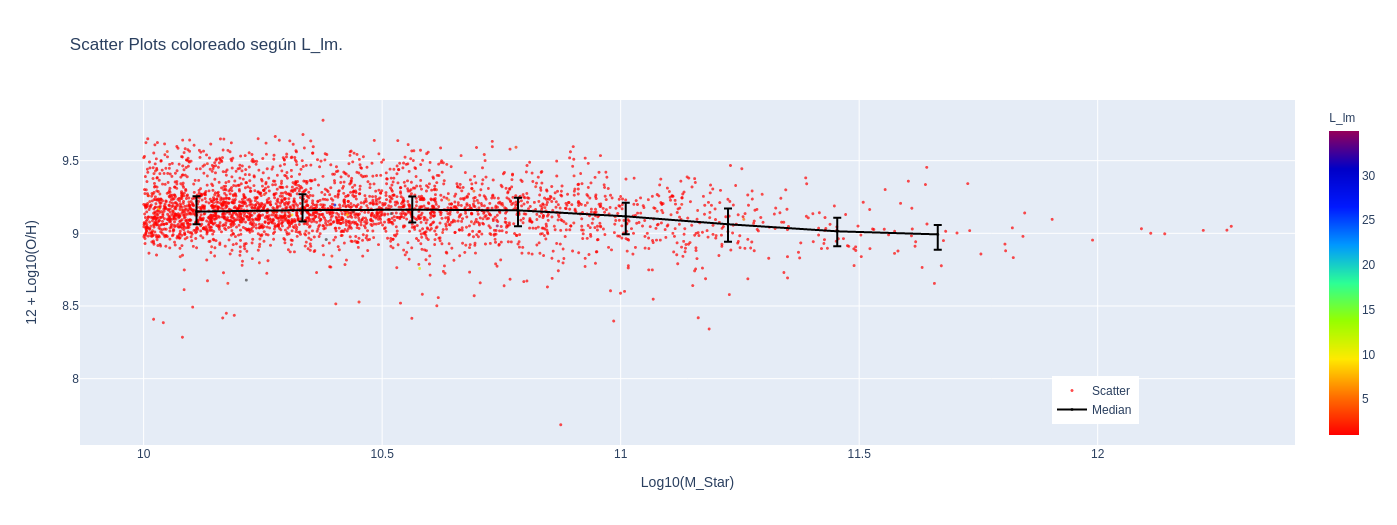

In [28]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## L_lmm:

In [29]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='L_lmm'
colors_var_label=r'$L_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-29-a12838181b15>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



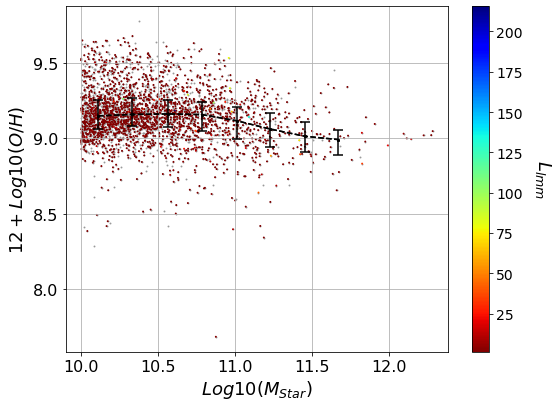

In [30]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [31]:
parametro ='L_lmm'

In [32]:
color = df[parametro][mask].to_numpy()

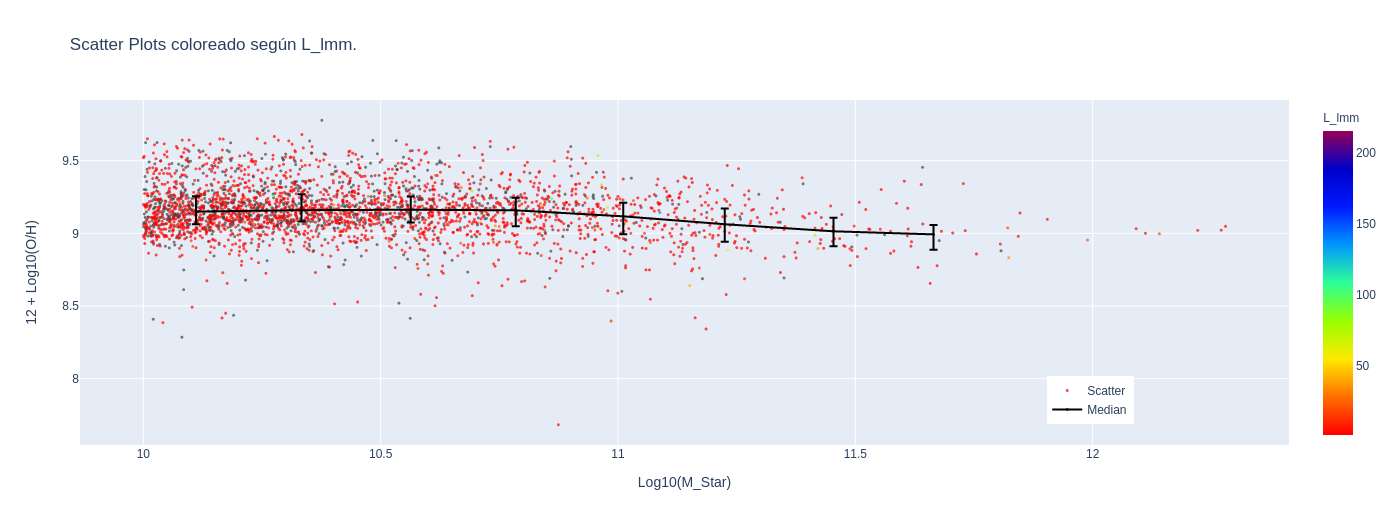

In [33]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## t_lm:

In [34]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='t_lm'
colors_var_label=r'$t_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-34-06c5febcd61f>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



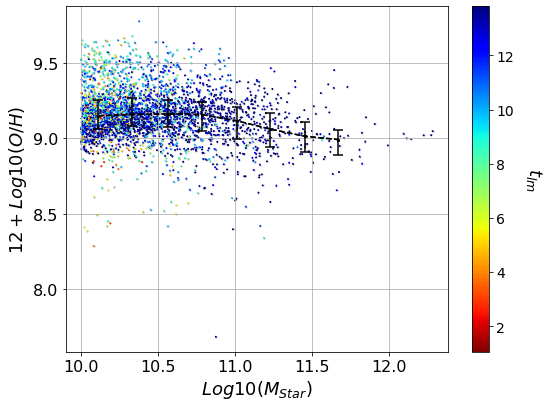

In [35]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [36]:
parametro ='t_lm'

In [37]:
color = df[parametro][mask].to_numpy()

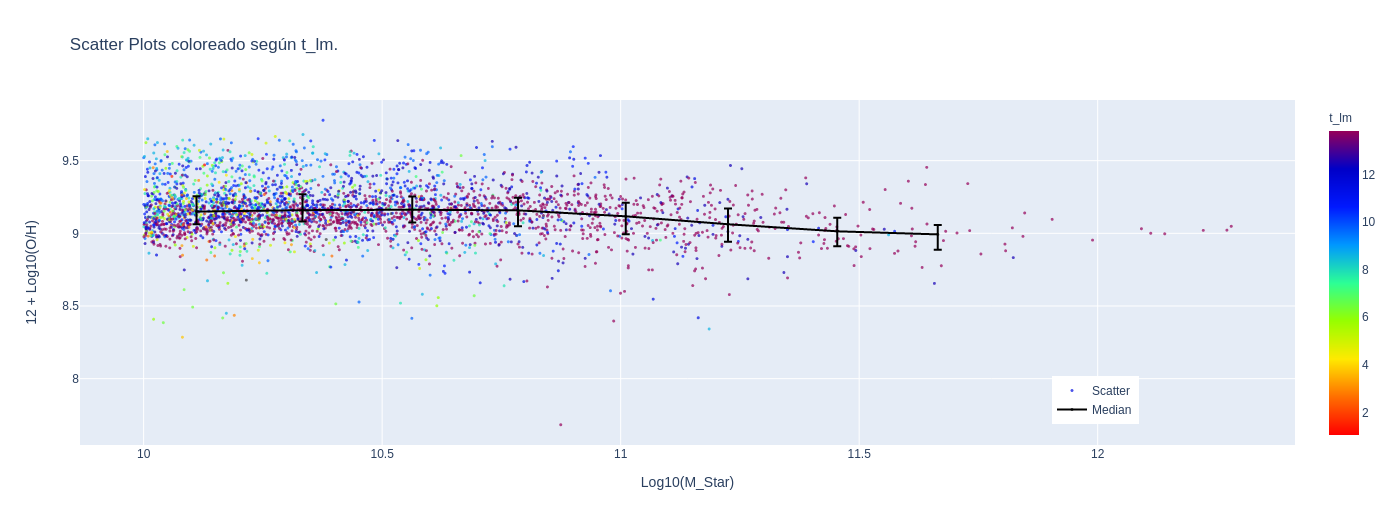

In [38]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## t_lmm:

In [39]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='t_lmm'
colors_var_label=r'$t_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-39-79aa1b5e15e2>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



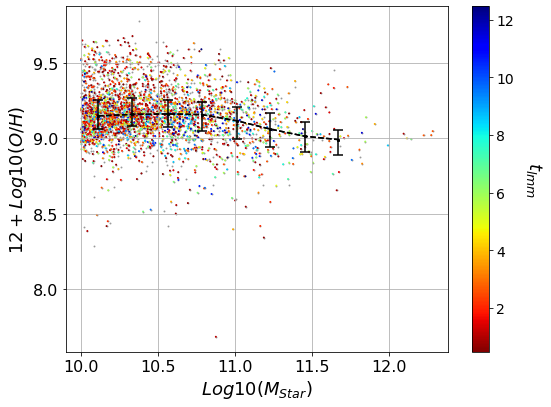

In [40]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [41]:
parametro ='t_lmm'

In [42]:
color = df[parametro][mask].to_numpy()

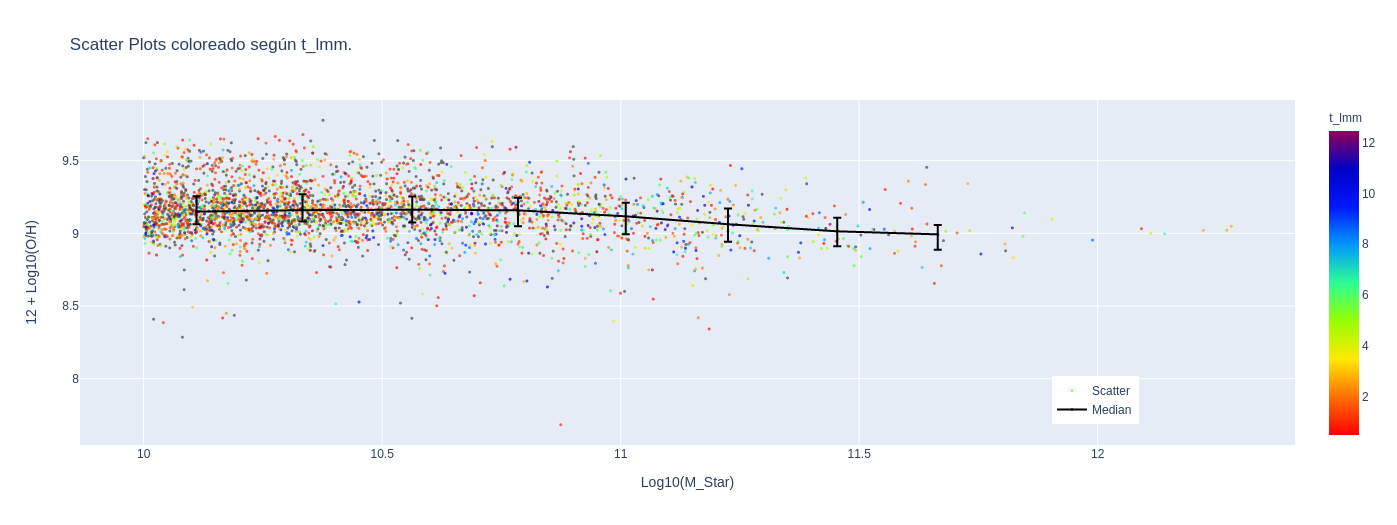

In [43]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## snap_lm:

In [44]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='snap_lm'
colors_var_label=r'$snap_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-44-3aa9aed37712>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



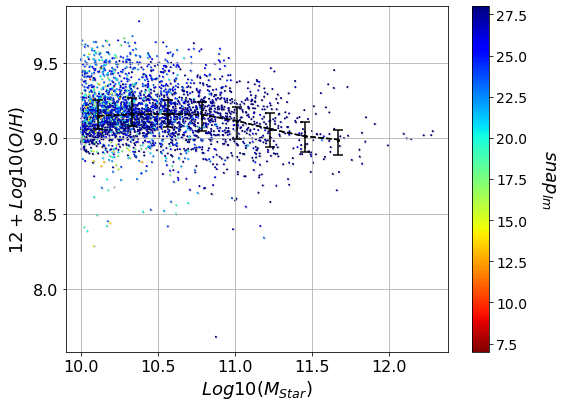

In [45]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [46]:
parametro ='snap_lm'

In [47]:
color = df[parametro][mask].to_numpy()

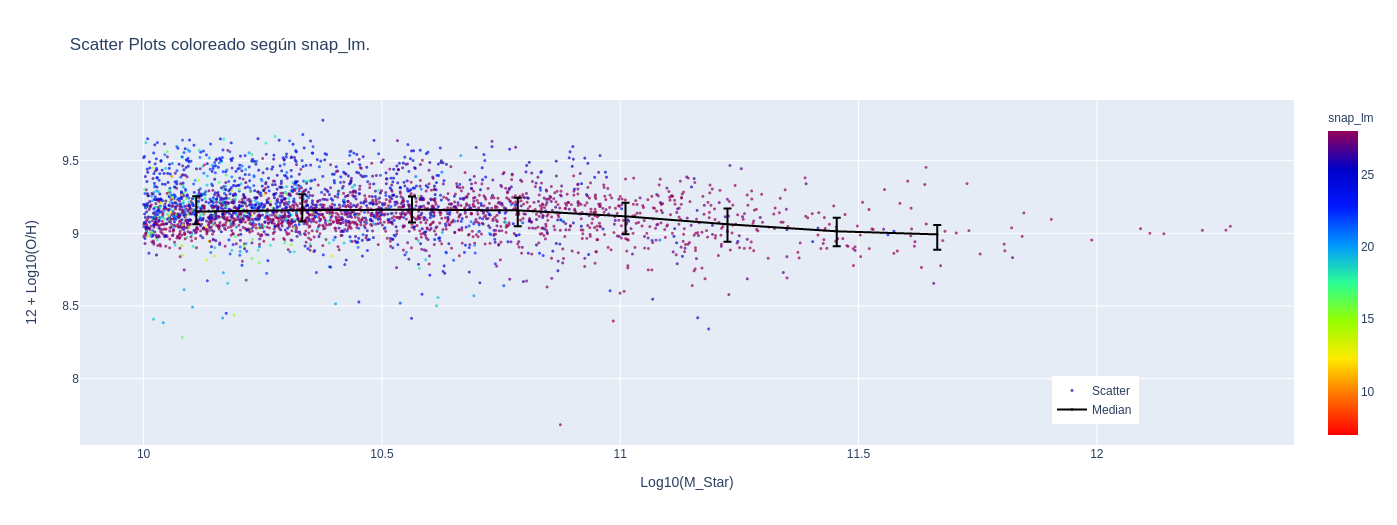

In [48]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

## snap_lmm:

In [49]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='snap_lmm'
colors_var_label=r'$snap_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-49-d537d1d626d1>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



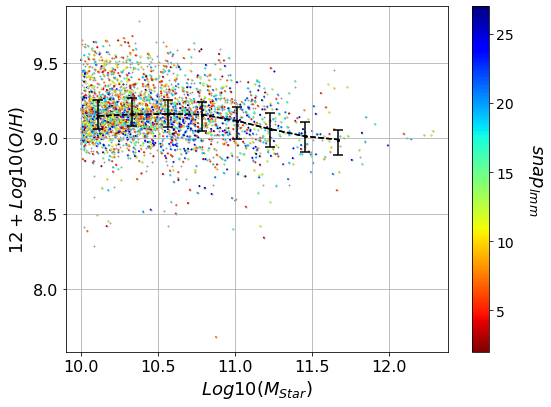

In [50]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

**Para plotly:**

In [51]:
parametro ='snap_lmm'

In [52]:
color = df[parametro][mask].to_numpy()

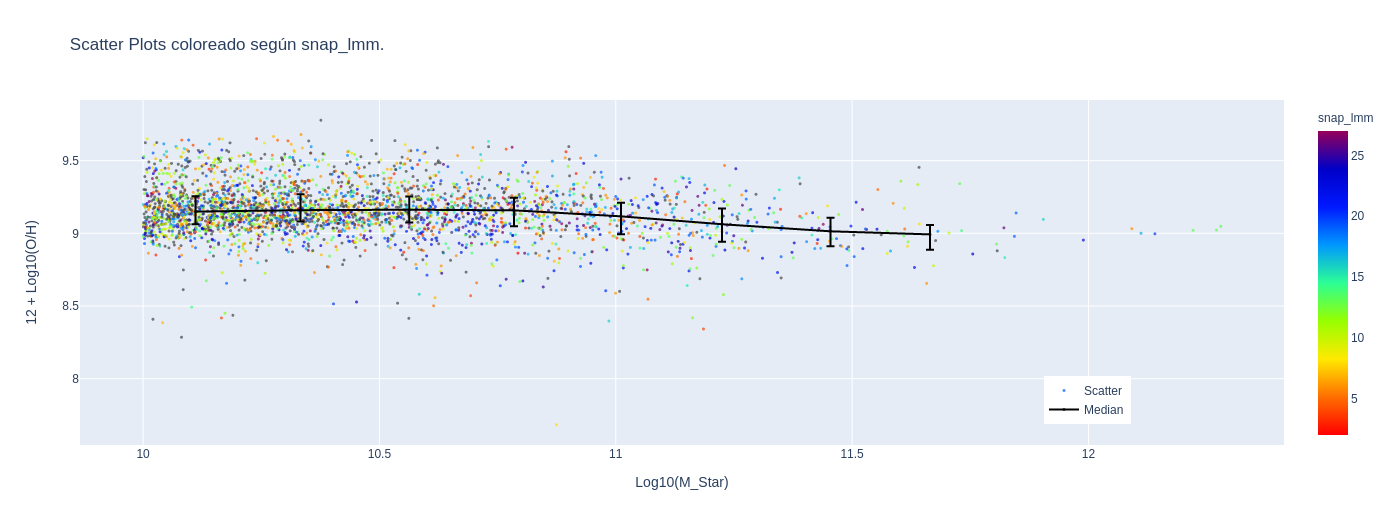

In [53]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 reversescale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 marker=dict(
                                 size=3,
                                 color="black",
                                 opacity=0.7),
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 color="black",
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+'.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

In [54]:
del colors

## Color maps para los parametros

**Tranformamos el dataframe en Table de astropy**

## t_lm:

In [55]:
from matplotlib import colors

In [56]:
astro_merge = Table(data=np.array(df),names=df.keys())

In [57]:
# Parámetro que colorea
parametro= 't_lm'

In [58]:
# Condiciones para seleccionar muestra
# mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [59]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$\log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(M_{O}/M_{H})$'

In [60]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-61-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



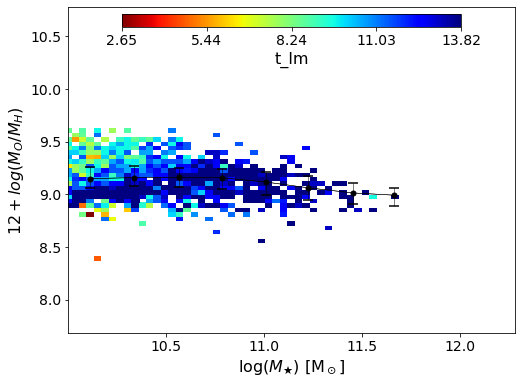

In [61]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## t_lmm:

In [62]:
# Parámetro que colorea
parametro= 't_lmm'

In [63]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-64-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



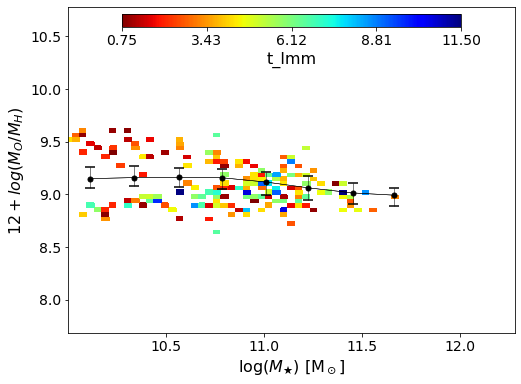

In [64]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## Z_lm:

In [65]:
# Parámetro que colorea
parametro= 'z_lm'

In [66]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-67-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



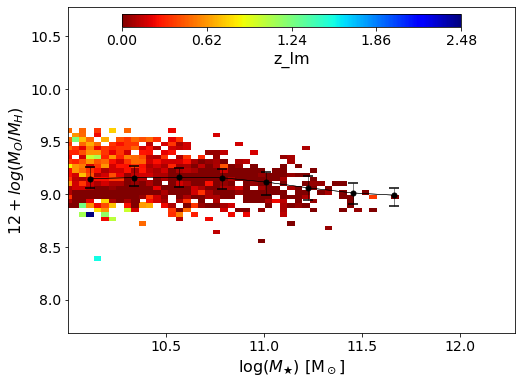

In [67]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## Z_lmm:

In [68]:
# Parámetro que colorea
parametro= 'z_lmm'

In [69]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-70-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



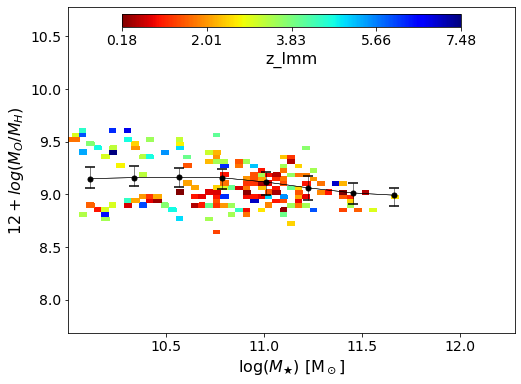

In [70]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## L_lm:

In [71]:
# Parámetro que colorea
parametro= 'L_lm'

In [72]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-73-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



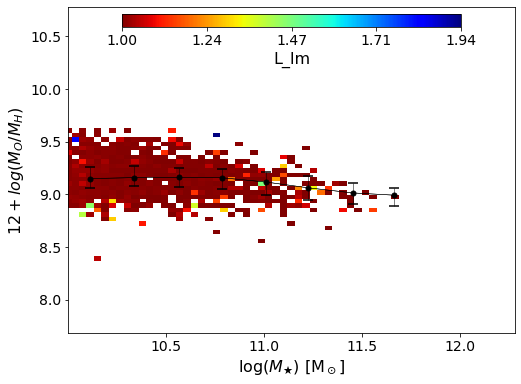

In [73]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## L_lmm:

In [74]:
# Parámetro que colorea
parametro= 'L_lmm'

In [75]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-76-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



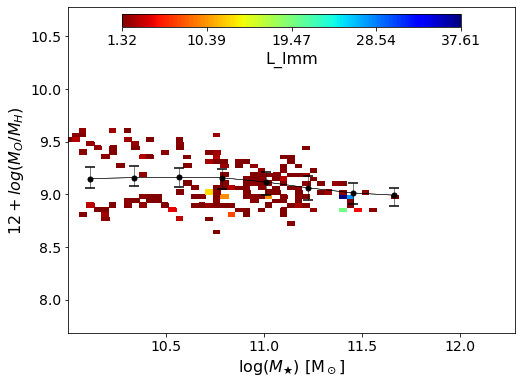

In [76]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## snap_lm:

In [77]:
# Parámetro que colorea
parametro= 'snap_lm'

In [78]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-79-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



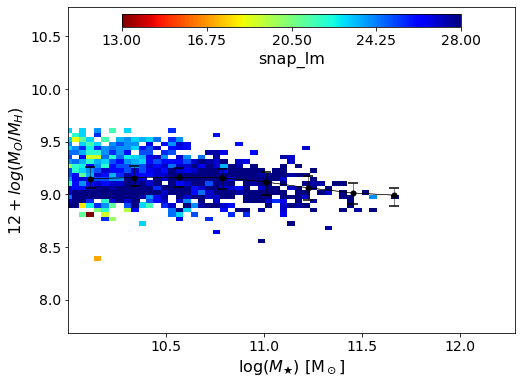

In [79]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## snap_lmm:

In [80]:
# Parámetro que colorea
parametro= 'snap_lmm'

In [81]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-82-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



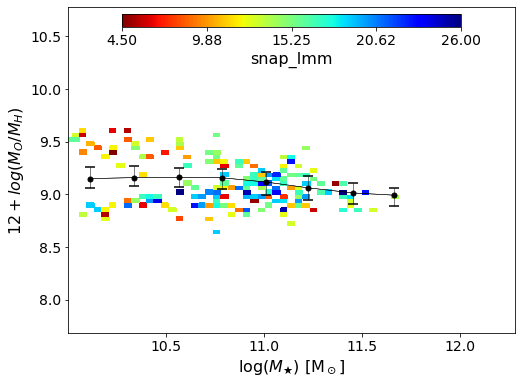

In [82]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## Calculamos los residuos para los diferentes parámetros